In [1]:
%load_ext autoreload
%autoreload 2

In [37]:
import os
import pandas as pd
import numpy as np

import time
from tqdm import tqdm
import datetime as dt
import pickle # read that in python3 pickle uses cpickle where possible
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 10)\

from data_handling import load_data

In [38]:
read_in = True
path = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/five_days_data.pickle'
parties = ['AfD', 'SPD', 'CDU', 'CSU', 'FDP', 'LINKE', 'Gruene', 'Grüne']
dates = ['08-{:02d}'.format(i) for i in range(26,32)]


if read_in:
    parties = parties
    dates = dates
    data = {}
    print('Loading: {}'.format(dates))
    for party in parties:
        load_list = ['../Data/{}/{}_2018-{}.json'.format(party, party, day) for day in dates]
        data[party] = load_data(load_list)
        print('{} loaded'.format(party))
    with open(path, 'wb') as fid:
        pickle.dump(data, fid)
    print("Done")
else:
    print('loading data from pickle')
    with open(path, 'rb') as fid:
        data = pickle.load(fid)
        print('data loaded')

  0%|          | 0/6 [00:00<?, ?it/s]

Loading: ['08-26', '08-27', '08-28', '08-29', '08-30', '08-31']


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:15<01:15, 15.14s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:52<01:45, 26.34s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [01:14<01:14, 24.71s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

AfD loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:02<00:14,  2.96s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:07<00:14,  3.68s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:11<00:11,  3.75s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

SPD loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:03<00:17,  3.46s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:07<00:14,  3.70s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:12<00:12,  4.29s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

CDU loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:02<00:13,  2.74s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:05<00:10,  2.65s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:07<00:07,  2.40s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

CSU loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:00<00:04,  1.02it/s]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:02<00:04,  1.18s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:05<00:05,  1.92s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

FDP loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:02<00:10,  2.01s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:09<00:18,  4.74s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:39<00:39, 13.27s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

LINKE loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:01<00:07,  1.50s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:03<00:06,  1.54s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:05<00:05,  1.75s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

Gruene loaded


/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 17%|█▋        | 1/6 [00:01<00:07,  1.57s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 33%|███▎      | 2/6 [00:03<00:06,  1.50s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

 50%|█████     | 3/6 [00:05<00:05,  1.80s/it]/home/franzi/Git-DSR/Twitter_sentimentanalysis/Scripts/data_handling.py:34: FutureWarning:

'created_at' is both an index level and a column label.
Defaulting to column, but t

Grüne loaded
Done


In [3]:
read_in = False
path = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/lda_complete_data.pickle'
parties = ['AfD', 'SPD', 'CDU', 'CSU', 'FDP', 'LINKE', 'Gruene', 'Grüne']
dates = ['08-{:02d}'.format(i) for i in range(2,32)]


if read_in:
    parties = parties
    dates = dates
    aug_data = {}
    print('Loading: {}'.format(dates))
    for party in parties:
        load_list = ['../Data/{}/{}_2018-{}.json'.format(party, party, day) for day in dates]
        aug_data[party] = load_data(load_list)
        print('{} loaded'.format(party))
    with open(path, 'wb') as fid:
        pickle.dump(aug_data, fid)
    print("Done")
else:
    print('loading data from pickle')
    with open(path, 'rb') as fid:
        aug_data = pickle.load(fid)
        print('data loaded')

loading data from pickle
data loaded


# Time series of tweets per minute

Count all tweets per timeframe and plot the tweetcount against time

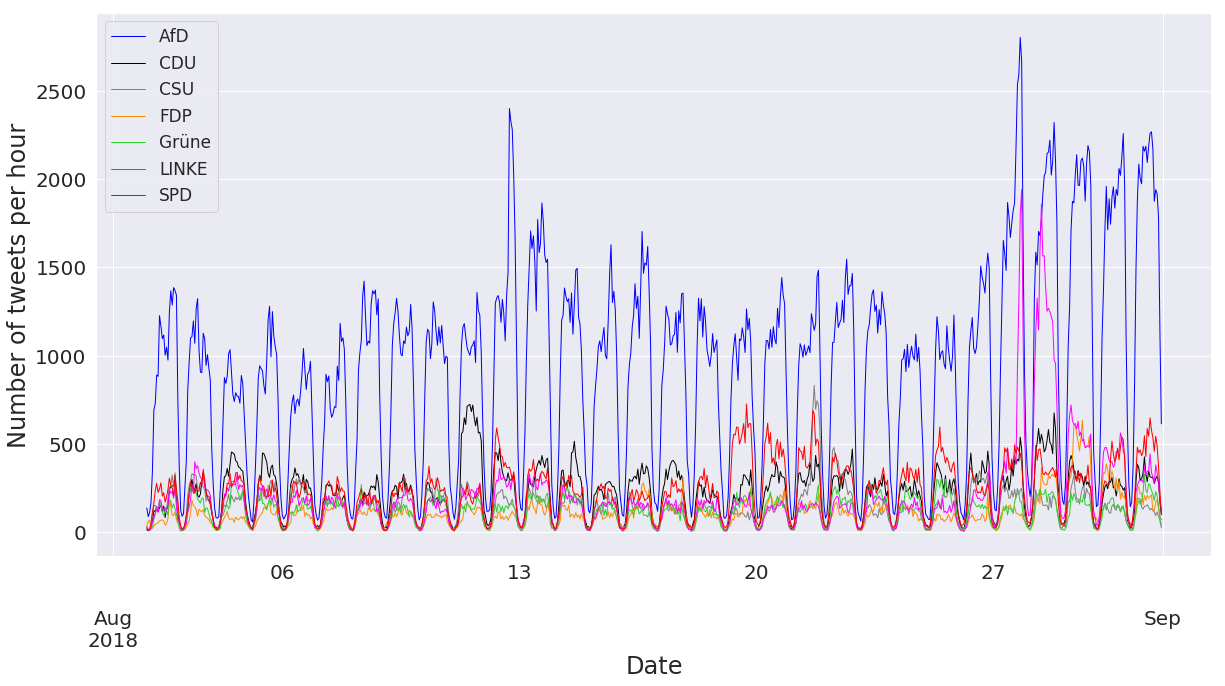

In [53]:
parties = ['AfD', 'CDU', 'CSU', 'FDP', 'Grüne', 'LINKE','SPD']
colors = ['blue', 'black', 'grey', 'darkorange', 'limegreen','magenta', 'red']


plt.figure(figsize=(20, 10))
ax = plt.axes()
for party, color in zip(parties, colors):
    aug_data[party].loc[:, 'full_text'].resample('h').count().plot(ax=ax, label=party, color=color, linewidth=1)
plt.legend(fontsize=17)
plt.ylabel("Number of tweets per hour", fontsize=24)
plt.xlabel("Date", fontsize=24) 
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.savefig('../Figures/hourly_tweetcount_alldata.png')

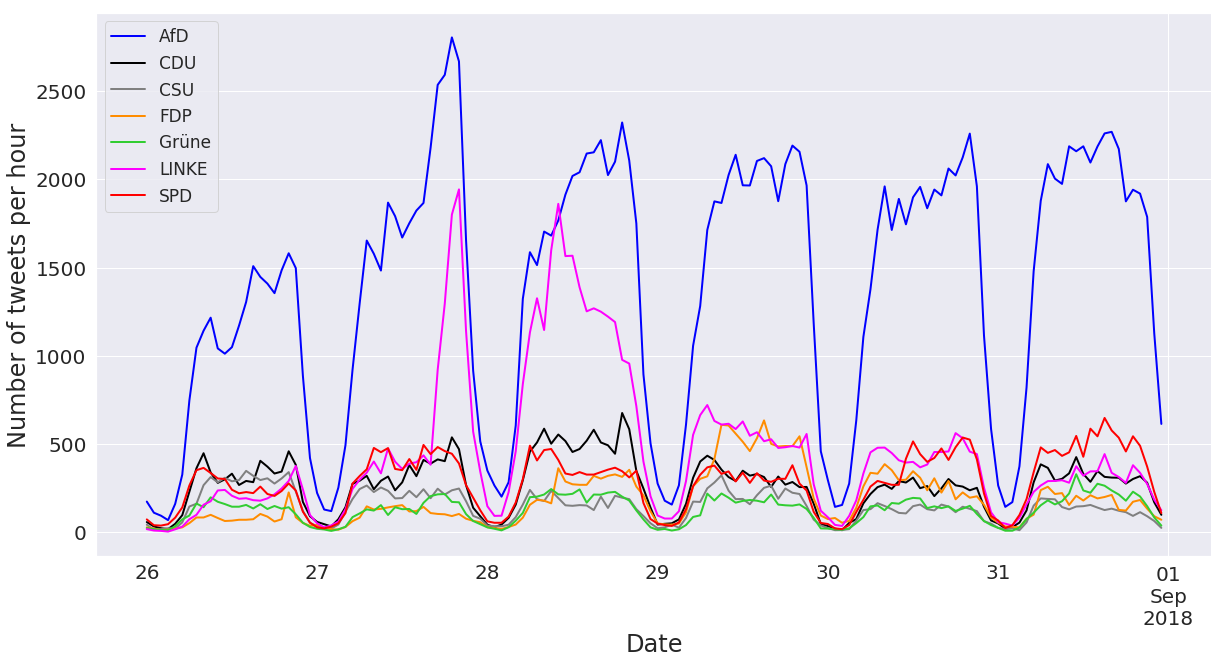

In [52]:
parties = ['AfD', 'CDU', 'CSU', 'FDP', 'Grüne', 'LINKE','SPD']
colors = ['blue', 'black', 'grey', 'darkorange', 'limegreen','magenta', 'red']


plt.figure(figsize=(20, 10))
ax = plt.axes()
for party, color in zip(parties, colors):
    data[party].loc[:, 'full_text'].resample('h').count().plot(ax=ax, label=party, color=color, linewidth=2)
plt.legend(fontsize=17)
plt.ylabel("Number of tweets per hour", fontsize=24)
plt.xlabel("Date", fontsize=24) 
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)


plt.savefig('../Figures/hourly_tweetcount_5days.png')

In [5]:
def plot_tweetcount(df_list):
    """
    Interactive plotly plot that shows exactly the same data as the previous plot but is interactive.
    """
    
#     define color for the respective party !sequence matters!
    party_colors = [['AfD', 'rgb(26, 124, 199)'],
                    ['SPD', 'rgb(210, 0, 0)'], 
                    ['CDU', 'rgb(0, 29, 77)'], 
                    ['CSU', 'rgb(26, 117, 255)'], 
                    ['LINKE', 'rgb(204, 0, 102)'], 
                    ['FDP', 'rgb(255, 204, 0)'], 
                    ['Gruene', 'rgb(0, 204, 0)']]
    
    traces = []

   
    for party, color in party_colors:
#         define the number of tweets per hour
        df = df_list[party]
        tweetcount = pd.DataFrame(df.loc[:, 'full_text'].
                                  resample('h').
                                  count())
#     define the traces for the plotly plot
        trace = go.Scatter(y = tweetcount.loc[:, 'full_text'],
                           x = tweetcount.index,
                           line = {'color': color},
                           name = party)
        traces.append(trace)
        
    
    layout = go.Layout(title='Party tweet-count per hour',
                       yaxis = dict(title='Tweets per hour'),
                       xaxis = dict(title='Days'))
    
    hourly_tweetcount = go.Figure(data=traces, layout=layout)
    py.offline.iplot(hourly_tweetcount)

In [6]:
plot_tweetcount(aug_data)